# Data wrangling in Bimbo

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display_markdown as mkdown # as print

## printing various files in Bimbo data set

In [4]:
def nl():
    print('\n')

for f in os.listdir('.'):
    print(f.ljust(30) + str(round(os.path.getsize('' + f) / 1000000, 2)) + 'MB')


cliente_tabla.csv             21.0MB
sample_submission.csv.zip     15.0MB
sample_submission.csv         68.0MB
town_state.csv                0.0MB
test.csv.zip                  89.0MB
DataCleaning.ipynb            0.0MB
.ipynb_checkpoints            0.0MB
clients_encoded.csv           17.0MB
cliente_tabla.csv.zip         6.0MB
train.csv                     3199.0MB
town_encoded.csv              0.0MB
BimboDatawrangling.ipynb      0.0MB
Untitled.ipynb                0.0MB
bimbo datawrangling.ipynb     0.0MB
town_state.csv.zip            0.0MB
test.csv                      251.0MB
producto_tabla.csv.zip        0.0MB
products_encoded.csv          10.0MB
producto_tabla.csv            0.0MB
train.csv.zip                 390.0MB
pyspark Testing.ipynb         0.0MB


## Reading test and train samples
### printing statistics of columns in test and train sample
#### just reading 50000 rows other wise it will hang up

In [5]:
df_train = pd.read_csv('train.csv',nrows=50000)
df_test = pd.read_csv('test.csv',nrows=50000)

nl()
print('Size of training set: ' + str(df_train.shape))
print(' Size of testing set: ' + str(df_test.shape))

nl()
print('Columns in train: ' + str(df_train.columns.tolist()))
print(' Columns in test: ' + str(df_test.columns.tolist()))

nl()
print(df_train.describe())



Size of training set: (50000, 11)
 Size of testing set: (50000, 7)


Columns in train: ['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima', 'Dev_proxima', 'Demanda_uni_equil']
 Columns in test: ['id', 'Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID']


        Semana    Agencia_ID      Canal_ID      Ruta_SAK    Cliente_ID  \
count  50000.0  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean       3.0   1110.839720      2.023060   1590.024620  1.185439e+06   
std        0.0      0.366869      2.383351    782.593183  1.535725e+06   
min        3.0   1110.000000      1.000000   1001.000000  1.407500e+04   
25%        3.0   1111.000000      1.000000   1025.000000  6.160800e+04   
50%        3.0   1111.000000      1.000000   1407.000000  4.196910e+05   
75%        3.0   1111.000000      1.000000   1423.000000  1.883449e+06   
max        3.0   1111.000000     11.000000   3504.00

### Trying to varify plot the histogram to see the Demanda_uni_equil column which we need to predict


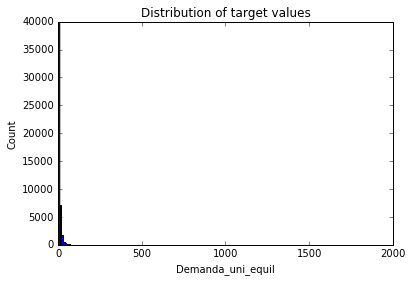

Looks like we have some pretty big outliers, let's zoom in and try again
Data with target values under 50: 99.0%


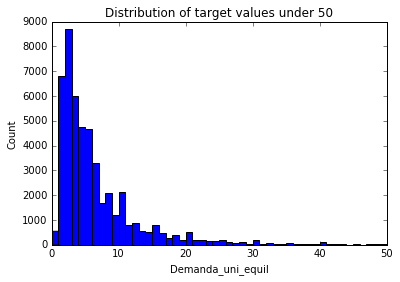

In [6]:
target = df_train['Demanda_uni_equil'].tolist()

def label_plot(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

plt.hist(target, bins=200, color='blue')
label_plot('Distribution of target values', 'Demanda_uni_equil', 'Count')
plt.show()

print("Looks like we have some pretty big outliers, let's zoom in and try again")

print('Data with target values under 50: ' + str(round(len(df_train.loc[df_train['Demanda_uni_equil'] <= 50]) / 500, 2)) + '%')

plt.hist(target, bins=50, color='blue', range=(0, 50))
label_plot('Distribution of target values under 50', 'Demanda_uni_equil', 'Count')
plt.show()

# Data cleaning in clent table

In [8]:
df=pd.read_csv('cliente_tabla.csv', index_col=0)

In [9]:
len(df)
len(df.NombreCliente)
len(df['NombreCliente'])

935362

In [15]:
client=df
client.head()

,NombreCliente
Cliente_ID,
0,SIN NOMBRE
1,OXXO XINANTECATL
2,SIN NOMBRE
3,EL MORENO
4,SDN SER DE ALIM CUERPO SA CIA DE INT


In [11]:
c= client
c = c[c.NombreCliente == 'NO IDENTIFICADO']
c.head(5)

,NombreCliente
Cliente_ID,
2465096,NO IDENTIFICADO
2465098,NO IDENTIFICADO
2465102,NO IDENTIFICADO
2465104,NO IDENTIFICADO
2465105,NO IDENTIFICADO


In [12]:
len(c)

281670

###  replacing NO IDENTIFICADO with nan for better ploting 

In [16]:
client.replace('NO IDENTIFICADO', np.nan, inplace=True)
client.tail(10)

,NombreCliente
Cliente_ID,
10351790,OXXO ALAMO II
10351796,OXXO ALAMO
10351802,OXXO IDOLO II
10351808,OXXO TUXPAM TAMIAHUA
10351814,OXXO DE LA LLAVE
11011586,OXXO PETEN
11693264,SUPER ABARROTES MARY
19988629,NaN
99999999,NaN


# ploting histogram to see if more columns has multiple values 

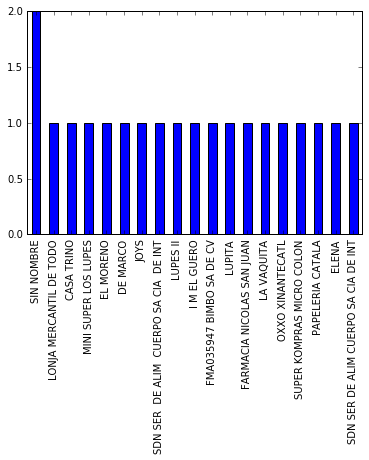

In [14]:
client[client.NombreCliente!= np.nan].NombreCliente.head(20).value_counts().plot(kind='bar')

### replacing SIN NOMBRE with nan too as per histogram that means in english as no name

In [18]:
client.replace('SIN NOMBRE', np.nan, inplace=True)
client.head(10)

,NombreCliente
Cliente_ID,
0,NaN
1,OXXO XINANTECATL
2,NaN
3,EL MORENO
4,SDN SER DE ALIM CUERPO SA CIA DE INT
4,SDN SER DE ALIM CUERPO SA CIA DE INT
5,LA VAQUITA
6,LUPITA
7,I M EL GUERO


# product table cleaning and organising

In [19]:
products = pd.read_csv('producto_tabla.csv')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 2 columns):
Producto_ID       2592 non-null int64
NombreProducto    2592 non-null object
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


In [21]:
products.head(10)

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72
5,73,Pan Multigrano Linaza 540g BIM 73
6,98,Tostado Integral 180g WON 98
7,99,Pan Blanco 567g WON 99
8,100,Super Pan Bco Ajonjoli 680g SP WON 100
9,106,Wonder 100pct mediano 475g WON 106


## Products attributes are filled in same column .
### Need to fill them is separate columns to identify
### products based on same product name but different attributes

In [22]:
products['grams'] = products.NombreProducto.str.extract('.* (\d+)g.*', expand=False)
products['ml'] = products.NombreProducto.str.extract('.* (\d+)ml.*', expand=False)
products['inches'] = products.NombreProducto.str.extract('.* (\d+)in.*', expand=False)
products['pct'] = products.NombreProducto.str.extract('.* (\d+)pct.*', expand=False)
products['pieces'] = products.NombreProducto.str.extract('.* (\d+)p.*', expand=False)
labels = products.NombreProducto.str.extract('([^\d]+) \d+.*', expand=False)
pr = pd.concat([products.drop('NombreProducto', axis=1),
                pd.get_dummies(labels)],
               axis=1)
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Columns: 1023 entries, Producto_ID to pct Whole Wheat
dtypes: float64(1017), int64(1), object(5)
memory usage: 20.2+ MB


In [23]:
pr.head(10)

,Producto_ID,grams,ml,inches,pct,pieces,Beso Nuez,Granos,Tarima MiniMilk Kitty Nav,ActiFresh Menta,...,Wonderbutter,g BAR,g Cj MTA MLA,g GBI,g MLA,g Prom CUB SAN,g Temp GBI,gCU LON,gMTA MLA,pct Whole Wheat
0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,480,NaN,NaN,NaN,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,170,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72,45,NaN,NaN,NaN,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,73,540,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,98,180,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,99,567,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100,680,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,106,475,NaN,NaN,100,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
